In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In this project, i will be working with the "tips" dataset.

# Data Description
The dataset contains information about various aspects of restaurant tips. The dataset consists of the following columns:

* total_bill: The total amount of the bill (including tax).

* tip: The tip amount given by the customer.

* sex: Gender of the payer (male or female).

* smoker: Whether the payer is a smoker (yes or no).

* day: The day of the week (e.g., Thursday, Friday, etc.).

* time: The time of day (Lunch or Dinner).

* size: The number of people in the dining party.
The dataset contains 244 records and provides insights into tipping behavior in restaurants.

# Methodology
The methodology for analyzing the "tips" dataset use involves the following steps:

* Data Loading and exploaration.

* Data Cleaning and Preprocessing.

* Descriptive Statistics.

* Exploratory Data Analysis (EDA).

* Statistical Analysis.

# Data Loading and exploaration.

In [65]:
# Load the "tips" dataset
tips = pd.read_csv('tips.csv')

In [66]:
# Explore the dataset
# Get the first five rows
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [67]:
# Get the first five rows
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [68]:
# Get the # of rows and columns
tips.shape

(244, 7)

In [69]:
# Get the informations about the dataset
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [70]:
# Print the column names
print(tips.columns)
# Print the # of columns
print('# of columns:',tips.columns.nunique())

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')
# of columns: 7


In [71]:
# Get the descriptive statistics
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [72]:
# Check for missing values
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [73]:
# Get the unique values in sex columns 
tips['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [74]:
# Get the unique values in smoker columns
tips['smoker'].unique()

array(['No', 'Yes'], dtype=object)

In [75]:
# Get the unique values in day columns
tips['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [76]:
# Get the unique values in time columns
tips['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [77]:
# Get the unique values in size columns
tips['size'].unique()  


array([2, 3, 4, 1, 6, 5], dtype=int64)

# Basic informtions about our data so far
* We have 244 observations(rows) and 7 variables(columns)
* No missing value in our dataset
* The column names are total_bill, tip, sex, smoker, day, time, and size.
* The average total bill, tip, and group size are $19.79, $3.00, and 2.57 persons, respectively.
* The total bill ranges from $3.07 to $50.81, while tips vary between $1.00 and $10.00. Dining group sizes range from 1 to 6 persons.
* For 'sex' the repondant catogorise themselve as either Male and Female 
* For 'smoker'smoke (Yes) or non-smoker (No)
* For 'day' we have Sun, Sat, Thur, and Fri
* For 'time' only Diner or Lunch.
* For table size are 1,2,3,4,5,6

# EDA - Visualization

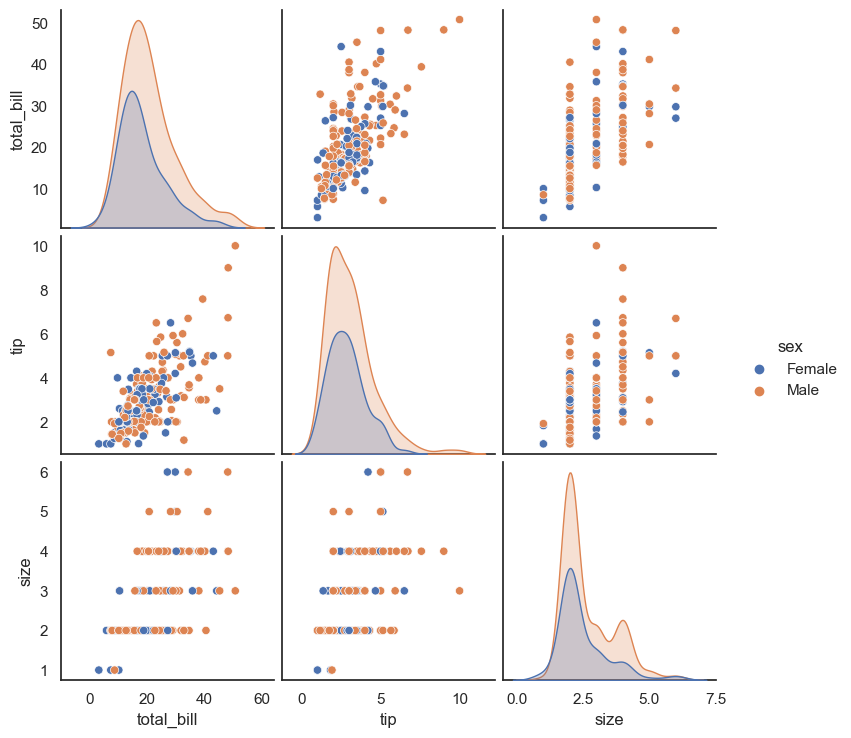

In [78]:
sns.pairplot(tips, hue='sex')
plt.show()

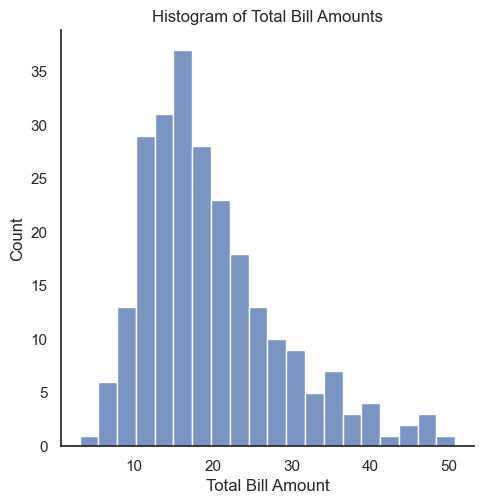

In [79]:
# Histogram of total bill amounts
sns.set_theme(style='white')
sns.displot(data=tips, x='total_bill', bins=20)
plt.title('Histogram of Total Bill Amounts')
plt.xlabel('Total Bill Amount')
plt.ylabel('Count')
plt.show()

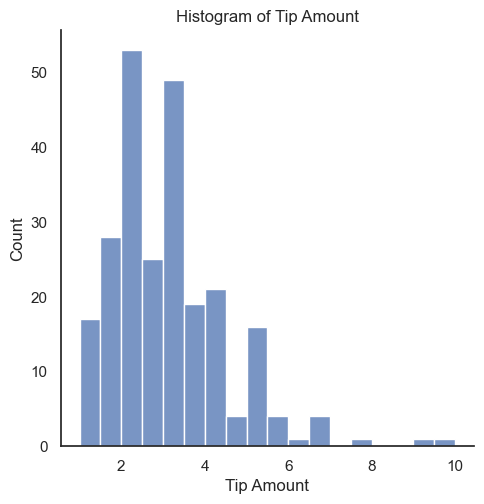

In [80]:
# Histogram of tip amount
sns.displot(data=tips, x='tip')
plt.title('Histogram of Tip Amount')
plt.xlabel('Tip Amount')
plt.ylabel('Count')
plt.show()

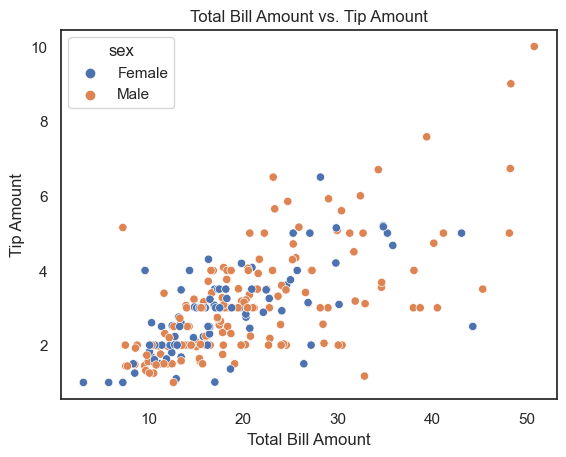

In [81]:
# Scatter plot of total bill amounts against tip amounts
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex')
plt.title('Total Bill Amount vs. Tip Amount')
plt.xlabel('Total Bill Amount')
plt.ylabel('Tip Amount')
plt.show()

In [82]:
# Correlation Analysis
correlation = tips[['total_bill', 'tip']].corr().round(2)
correlation

,total_bill,tip
total_bill,1.00,0.68
tip,0.68,1.00


The correlation coefficient of 0.68 suggests that there is a positive relationship between the total bill amount and the tip amount. As the total bill amount increases, there tends to be a tendency for the tip amount to also increase, indicating a positive correlation between these variables. The moderate positive correlation suggests that there is a tendency for customers to tip a higher amount when the total bill is higher, but the relationship is not extremely strong. refer to the scatter plot and correlation matrix.

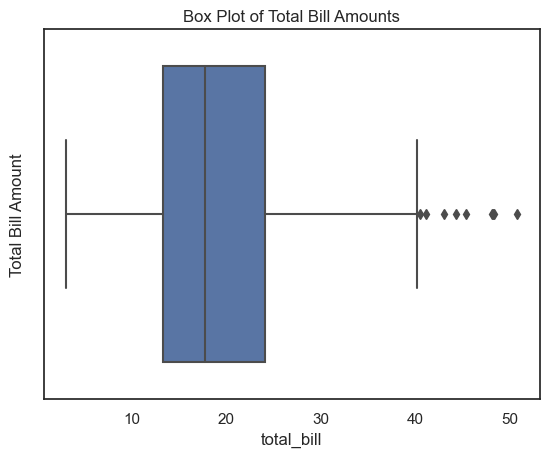

In [83]:
# Box plot of total bill amounts
sns.boxplot(data=tips, x='total_bill')
plt.title('Box Plot of Total Bill Amounts')
plt.ylabel('Total Bill Amount')
plt.show()

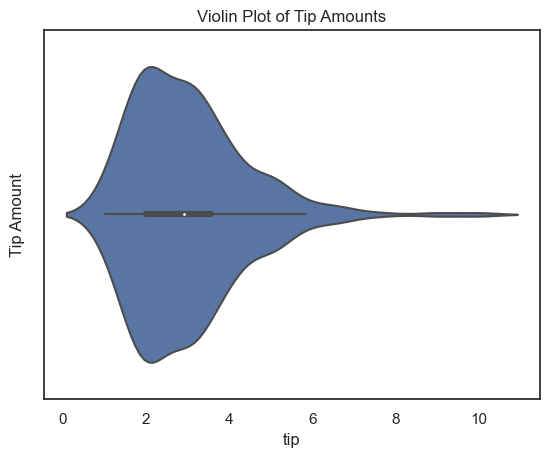

In [84]:
# Violin plot of tip amounts
sns.violinplot(data=tips, x='tip')
plt.title('Violin Plot of Tip Amounts')
plt.ylabel('Tip Amount')
plt.show()

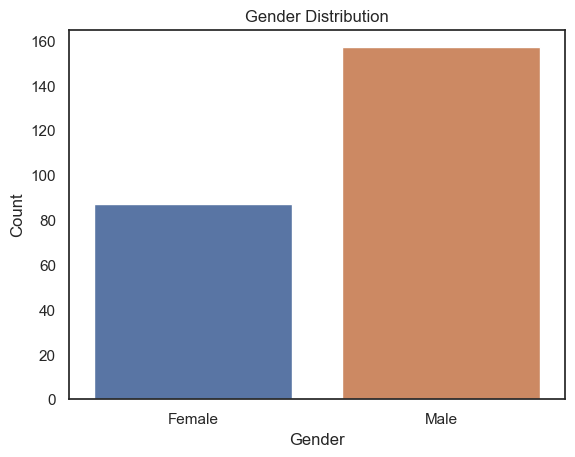

In [85]:
# Count plot of gender distribution
sns.countplot(data=tips, x='sex')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

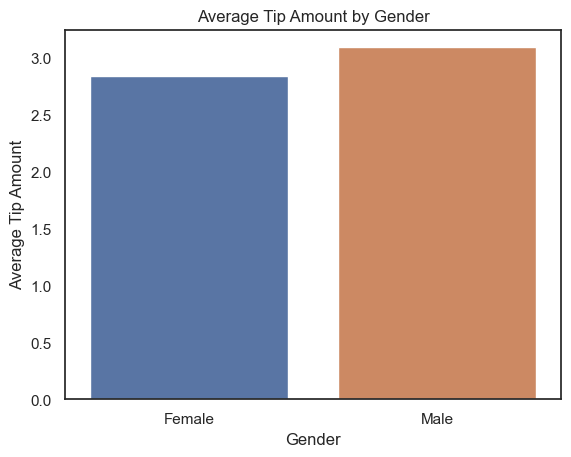

In [86]:
# Bar plot comparing average tip amounts by gender
sns.barplot(data=tips, x='sex', y='tip', ci=False)
plt.title('Average Tip Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Tip Amount')
plt.show()

The average tip amount for males and females are $3.1 and $2.8 respectively.

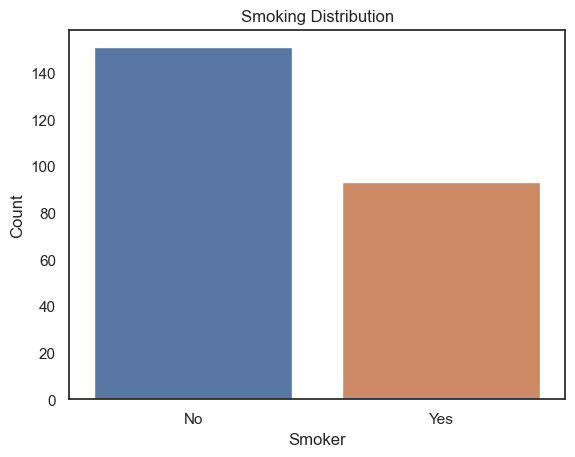

In [87]:
# Count plot of smoking distribution
sns.countplot(data=tips, x='smoker')
plt.title('Smoking Distribution')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

There are 151 individuals classified as non-smokers and 93 individuals classified as smokers. It reveals that there are more non-smokers (151 individuals) than smokers (93 individuals) in the dataset.

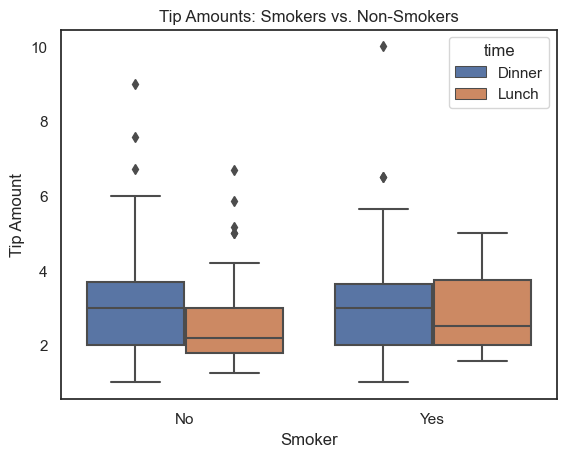

In [88]:
# Box plot comparing tip amounts between smokers and non-smokers
sns.boxplot(data=tips, x='smoker', y='tip', hue='time')
plt.title('Tip Amounts: Smokers vs. Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Tip Amount')
plt.show()

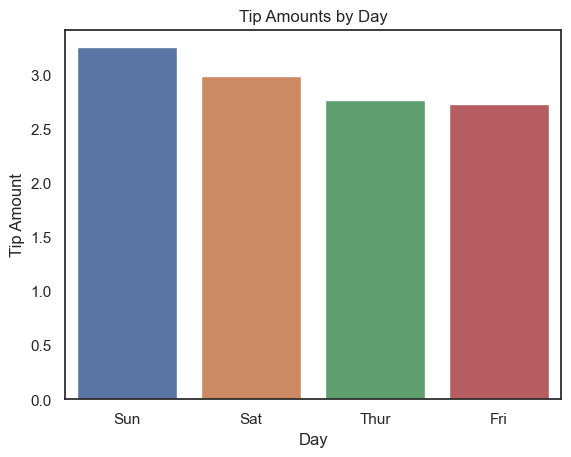

In [89]:
# Bar plot of tip amounts by day
sns.barplot(data=tips, x='day', y='tip', ci=False)
plt.title('Tip Amounts by Day')
plt.xlabel('Day')
plt.ylabel('Tip Amount')
plt.show()

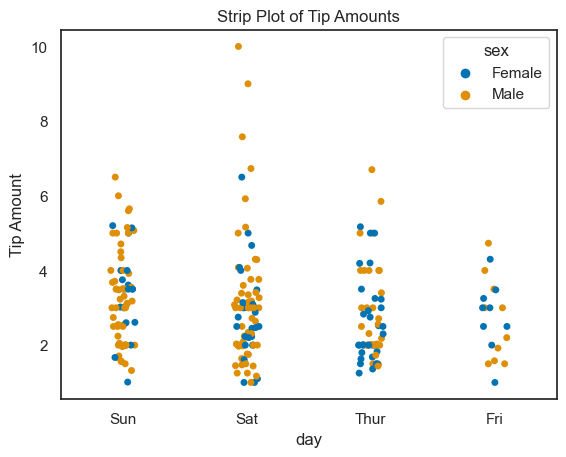

In [90]:
# Strip plot of tip amounts
sns.stripplot(data=tips,x='day', y='tip', hue='sex', palette='colorblind')
plt.title('Strip Plot of Tip Amounts')
plt.ylabel('Tip Amount')
plt.show()

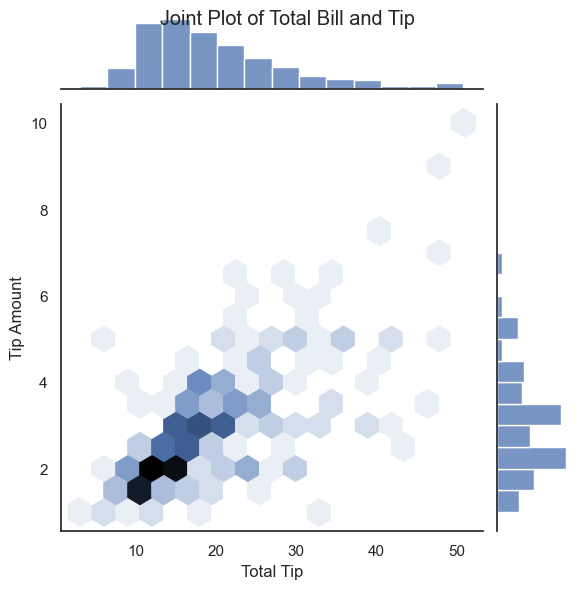

In [91]:
# Joint plot of 'total_bill' and 'tip'
sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex')
plt.suptitle('Joint Plot of Total Bill and Tip')
plt.xlabel('Total Tip')
plt.ylabel('Tip Amount')
plt.show()

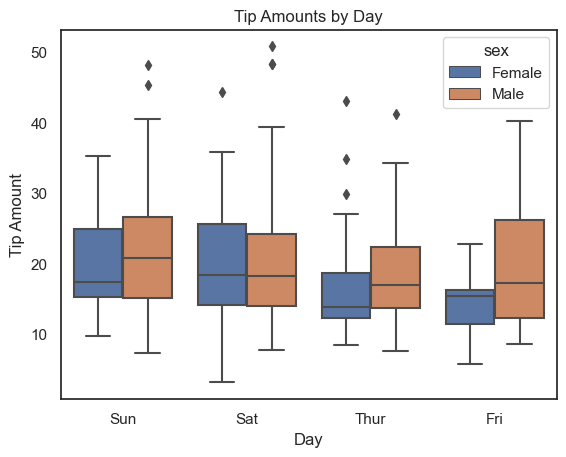

In [92]:
# Box plot of total bill amounts by day
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex')
plt.title('Tip Amounts by Day')
plt.xlabel('Day')
plt.ylabel('Tip Amount')
plt.show()

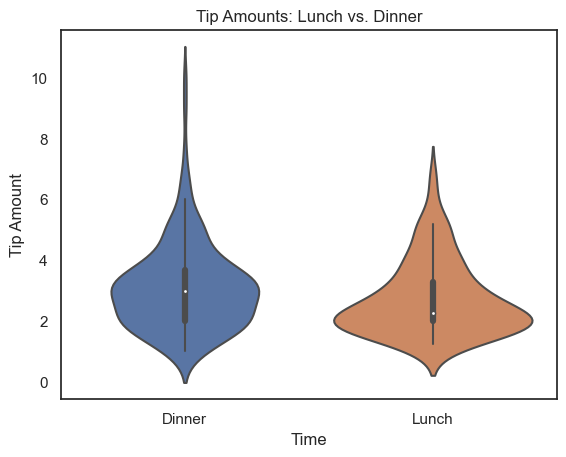

In [93]:
# Violin plot comparing tip amounts between lunch and dinner
sns.violinplot(data=tips, x='time', y='tip')
plt.title('Tip Amounts: Lunch vs. Dinner')
plt.xlabel('Time')
plt.ylabel('Tip Amount')
plt.show()

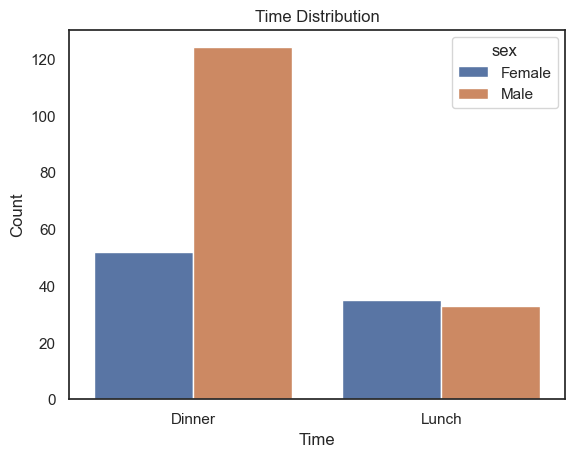

In [94]:
# Count plot of time distribution
sns.countplot(data=tips, x='time', hue='sex')
plt.title('Time Distribution')
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()

I created a new column called tip_percentage to further analyze the data,reason to;

* Normalization of Tip Amounts.
* Comparative Analysis.

In [95]:
# Average Tip Percentage Calculation
tips['tip_percentage'] = (tips['tip'] / tips['total_bill']) * 100

In [96]:
# Average Tip Percentage Analysis
average_tip_percentage = tips['tip_percentage'].mean()
print(f"Average Tip Percentage: {average_tip_percentage:.1f}%")
print()

Average Tip Percentage: 16.1%



In [97]:
# Compute the mean of tip column grouped by sex
group_df1 = tips.groupby('sex')['tip'].mean().reset_index().round(1)

# Compute the mean of tip_percentage column grouped by sex
group_df2 = tips.groupby('sex')['tip_percentage'].mean().reset_index().round(1)

# Print the result
print('Tip (in $):',group_df1)
print('Tip Percentage(%):',group_df2)

Tip (in $):       sex  tip
0  Female  2.8
1    Male  3.1
Tip Percentage(%):       sex  tip_percentage
0  Female            16.6
1    Male            15.8


In [98]:
# Compute the mean of tip column grouped by day
group_df3 = tips.groupby('day')['tip'].mean().reset_index().round(1)

# Compute the mean of tip_percentage column grouped by day
group_df4 = tips.groupby('day')['tip_percentage'].mean().reset_index().round(1)


# Print the result
print('Tip (in $):', group_df3)
print('Tip Percentage(%):',group_df4)

Tip (in $):     day  tip
0   Fri  2.7
1   Sat  3.0
2   Sun  3.3
3  Thur  2.8
Tip Percentage(%):     day  tip_percentage
0   Fri            17.0
1   Sat            15.3
2   Sun            16.7
3  Thur            16.1


In [99]:
# Compute the mean of tip column grouped by day
group_df5 = tips.groupby('time')['tip'].mean().reset_index().round(1)

# Compute the mean of tip_percentage column grouped by day
group_df6 = tips.groupby('time')['tip_percentage'].mean().reset_index().round(1)


# Print the result
print('Tip (in $):', group_df5)
print('Tip Percentage(%):',group_df6)

Tip (in $):      time  tip
0  Dinner  3.1
1   Lunch  2.7
Tip Percentage(%):      time  tip_percentage
0  Dinner            16.0
1   Lunch            16.4


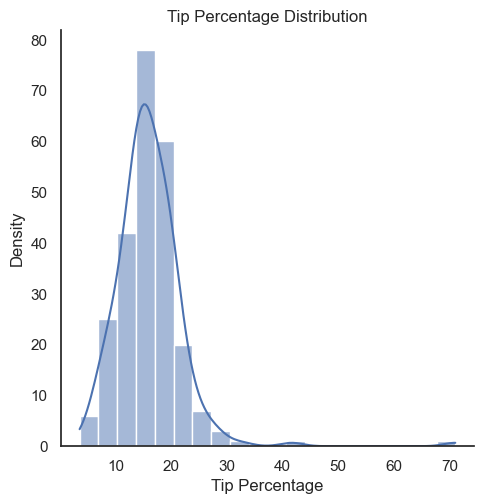

In [100]:
# Visualize Tip Percentage Distribution
sns.displot(tips['tip_percentage'], bins=20, kde=True)
plt.title('Tip Percentage Distribution')
plt.xlabel('Tip Percentage')
plt.ylabel('Density')
plt.show()

In [101]:
# Create a new 'date' column with random daily data
np.random.seed(123)  # Set a seed for reproducibility
tips['date'] = pd.date_range(start='2022-01-01', end='2022-09-01', freq='D')

Note: The tips dataset does not originally include dates. However, for the purpose of exploring the trend of tip amounts, I have created a synthetic monthly date range. Please be aware that this date is randomly generated and is solely used to visualize the trend effectively.

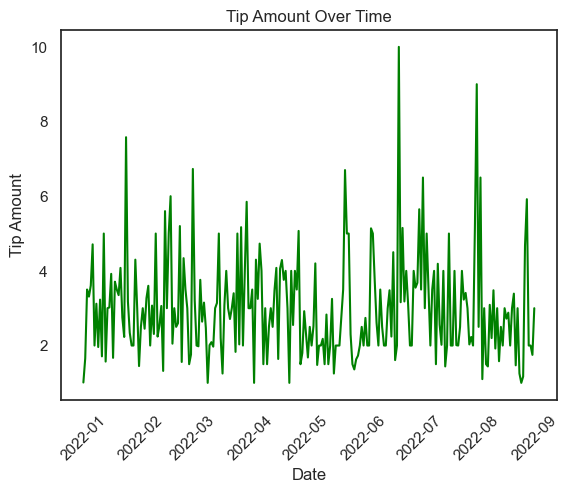

In [102]:
# Create a line plot of tip amount over time
plt.plot(tips['date'], tips['tip'], color='green')
plt.xlabel('Date')
plt.ylabel('Tip Amount')
plt.title('Tip Amount Over Time')
plt.xticks(rotation=45)
plt.show()

In [103]:
# Group Analysis: Average Tip Amounts by Gender, Day, and Time
grouped_tip_amounts = tips.groupby(['sex', 'day', 'time'])['tip'].mean().reset_index().round(2)
print("Grouped Analysis - Average Tip Amounts:")
grouped_tip_amounts

Grouped Analysis - Average Tip Amounts:


,sex,day,time,tip
0,Female,Fri,Dinner,2.81
1,Female,Fri,Lunch,2.74
2,Female,Sat,Dinner,2.80
3,Female,Sun,Dinner,3.37
4,Female,Thur,Dinner,3.00
5,Female,Thur,Lunch,2.56
6,Male,Fri,Dinner,3.03
7,Male,Fri,Lunch,1.90
8,Male,Sat,Dinner,3.08
9,Male,Sun,Dinner,3.22


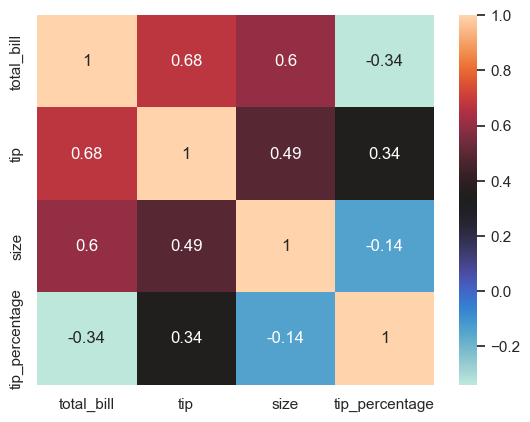

In [104]:
sns.heatmap(tips.corr(), annot=True, cmap='icefire')
plt.show()

# Statistical Analysis

In [105]:
# Import libraries
import scipy.stats as stats
from scipy.stats import ranksums
from sklearn.decomposition import PCA
import statsmodels.api as sm

In [106]:
 # T-test between male and female tip amounts
male_tips = tips.loc[tips['sex'] == 'Male', 'tip']
female_tips = tips.loc[tips['sex'] == 'Female', 'tip']
t_stat, p_value = stats.ttest_ind(male_tips, female_tips)
print("T-statistic:", t_stat)
print("P-value:", p_value)
print()

T-statistic: 1.387859705421269
P-value: 0.16645623503456755



With a t-statistic of 1.3878597054212687, we observe a positive difference in mean tip amounts between males and females. However, it is important to note that the magnitude of the t-statistic is relatively small. The p-value of 0.16645623503456763 suggests that there is no strong evidence to reject the null hypothesis. This means that we do not have sufficient evidence to conclude that there is a significant difference in mean tip amounts between males and females in the dataset.

In [107]:
# Analysis of Variance (ANOVA)
# One-way ANOVA for tip amounts across different days of the week
anova_result = stats.f_oneway(tips.loc[tips['day'] == 'Thur', 'tip'],
                              tips.loc[tips['day'] == 'Fri', 'tip'],
                              tips.loc[tips['day'] == 'Sat', 'tip'],
                              tips.loc[tips['day'] == 'Sun', 'tip'])
print("ANOVA Result:")
print("F-statistic:", anova_result.statistic)
print("P-value:", anova_result.pvalue)
print()

ANOVA Result:
F-statistic: 1.6723551980998699
P-value: 0.17358855530405373



The F-statistic is small, indicating that the means of tip amounts across different days are not significantly different. The p-value is greater than the significance level of 0.05, meaning there is no significant difference in mean tip amounts across the days of the week and we cannot reject the null hypothesis.

In [108]:
# Wilcoxon rank-sum test for tip amounts between smokers and non-smokers
smoker_tips = tips.loc[tips['smoker'] == 'Yes', 'tip']
non_smoker_tips = tips.loc[tips['smoker'] == 'No', 'tip']
ranksum_stat, p_value = ranksums(smoker_tips, non_smoker_tips)
print("Wilcoxon Rank-Sum Test:")
print("Ranksums statistic:", ranksum_stat)
print("P-value:", p_value)
print()

Wilcoxon Rank-Sum Test:
Ranksums statistic: 0.26426160768791973
P-value: 0.7915783416163665



In [109]:
# Perform PCA on numerical variables
numerical_vars = tips[['total_bill', 'tip', 'size']]
pca = PCA()
pca.fit(numerical_vars)
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)
print()

Explained Variance Ratio:
[0.98043508 0.0128131  0.00675182]



Ranksums statistic of 0.26426160768791973 shows no significant difference in tip amounts between smokers and non-smokers. The p-value of 0.7915783416163665 is greater than 0.05, indicating insufficient evidence to reject the null hypothesis of no difference in tip amounts between smokers and non-smokers.

In [110]:
# Chi-square test for independence between smoker and day
contingency_table = pd.crosstab(tips['smoker'], tips['day'])
chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)
print()

Chi-square statistic: 25.787216672396262
P-value: 1.0567572499836523e-05



With a chi-square statistic of 25.787216672396262, we observe a relatively large value, indicating a significant relationship between smoking status and the day of the week. The p-value of 1.0567572499836523e-05 is extremely small. This suggests strong evidence against the null hypothesis, which assumes independence between the variables. Based on this result, we can conclude that there is a significant relationship between smoking status and the day of the week in the "tips" dataset. In other words, smoking status and the day of the week are not independent of each other.

In [111]:
# Regression Analysis
X = tips[['total_bill', 'size']]  # Independent variables
X = sm.add_constant(X)  # Add constant for the intercept term
y = tips['tip']  # Dependent variable

model = sm.OLS(y, X)
results = model.fit()

print("Regression Analysis:")
print(results.summary())

Regression Analysis:
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           9.67e-34
Time:                        13:49:45   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.19

* **Total bill:** The coefficient for 'total_bill' is 0.0927. Meaning, on average, a one-unit increase in 'total_bill' is associated with a 0.0927 unit increase in 'tip'. In other words, as the total bill amount increases, the tip amount tends to increase by approximately 9.27 cents, on average.

* **Size:** The coefficient for 'size' is 0.1926. Meaning, on average, a one-unit increase in 'size' (e.g., an additional person in the dining group) is associated with a 0.1926 unit increase in 'tip'. This means that larger dining groups tend to leave a slightly higher tip amount, on average.

* The **Adjusted R-squared** value of 0.463 suggests that around 46.3% of the variability in 'tip' can be explained by the linear combination of 'total_bill' and 'size' in the model.

* Both variables are statistically significant at the 5% significance level.

# Machine Learning

In [112]:
# Import machine learning libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [113]:
# X contains the features 'total_bill' and 'size'
X = tips[['total_bill', 'size']]

# y contains the target variable 'tip'
y = tips['tip']

In [114]:
# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [115]:
# Create the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [116]:
# Predict 'tip' values on the testing data
y_pred = model.predict(X_test)

In [117]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Mean Squared Error (MSE): 0.8342088880725631
R-squared: 0.3326175906132479


The MSE value of 0.8342 explain that, on average, the model's predictions are relatively close to the actual 'tip' values in the testing set.
The R-squared value of 0.3326 indicates that the model explains about 33.26% of the variance in the 'tip' variable using the given features ('total_bill' and 'size'). However, it also implies that a significant portion of the variance remains unexplained, possibly due to other factors not included in the model or inherent randomness in the data.

In [118]:
# Print the predicted values for our model
y_pred

array([3.648     , 1.7454    , 3.5798    , 4.2589    , 1.9236    ,
       3.35443333, 3.1383    , 1.647     , 2.3789    , 1.6917    ,
       3.7598    , 1.9404    , 1.9711    , 2.4302    , 1.5966    ,
       3.0785    , 2.8512    , 3.815     , 3.124     , 4.8258    ,
       3.7718    , 3.1781    , 2.4412    , 3.1247    , 3.5821    ,
       2.7828    , 2.363     , 4.2334    , 3.0659    , 7.5462    ,
       3.751     , 2.8327    , 2.67386667, 2.7123    , 2.1743    ,
       3.1193    , 2.0053    , 4.5975    , 2.1577    , 3.1723    ,
       1.9713    , 2.3479    , 3.2656    , 1.8684    , 2.0048    ,
       1.4227    , 1.9711    , 2.8512    , 2.8327    ])